<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from PIL import Image
import time
from matplotlib import pyplot as plt
import cv2
#şekildedektöründen ShapeDetector'ı içe aktar
import argparse
import imutils

In [1]:
str1='20170925_20171112.geo.unw' #Aboneler arasındaki satır

In [5]:
img = Image.open(str1 + '.png' )
data = np.array(img, dtype='uint8')
image = cv2.imread(str1 + '.png')

(805, 1117, 4) (805, 1117, 3)


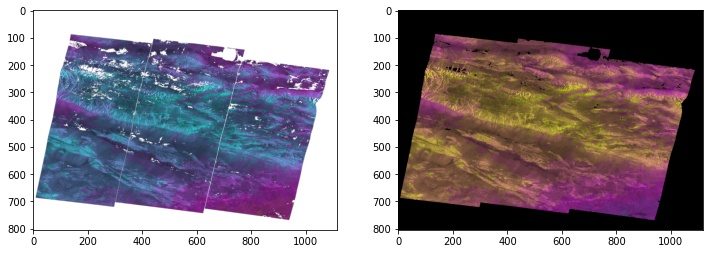

In [ ]:
print(data.shape, image.shape)

plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(data)
plt.subplot(122), plt.imshow(image)
plt.show()

In [ ]:
a=data[:,:,3]
#a= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
a=255-a
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY)[1]
#thresh = cv2.adaptiveThreshold(a,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
#kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f268f2dc8d0>,
 <matplotlib.image.AxesImage at 0x7f268f24c278>)

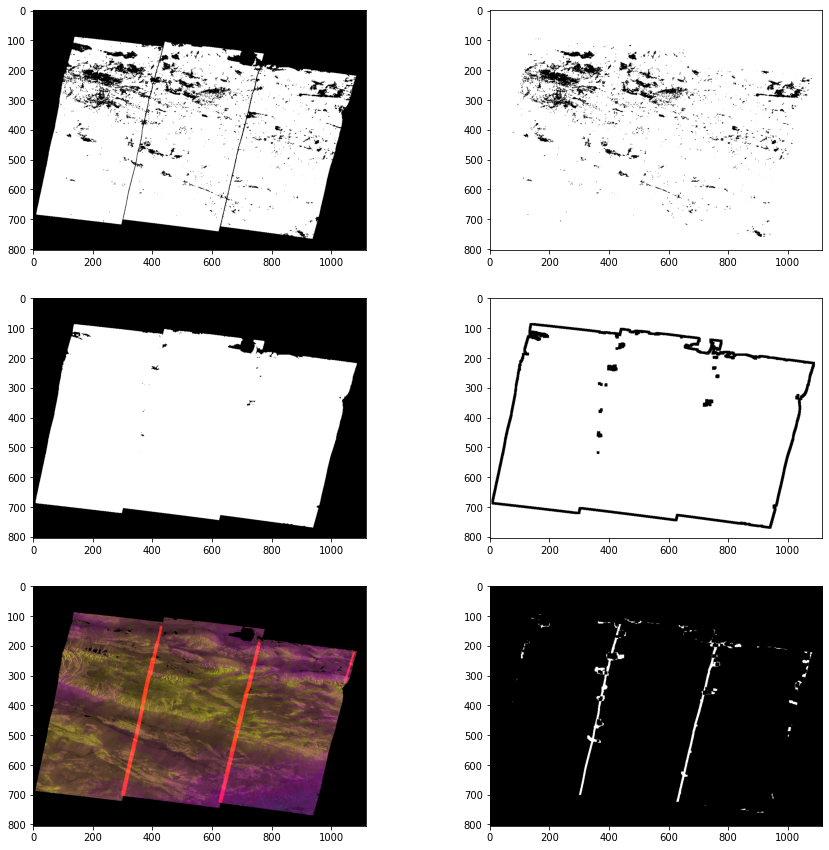

In [ ]:
#delik doldurma
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY_INV)[1]
im_floodfill = thresh.copy()
h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);


final = np.multiply(255-thresh, im_floodfill)
line_image = np.copy(image) * 0
mask = 1 - final
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
final = cv2.morphologyEx(final, cv2.MORPH_DILATE, kernel)
final = np.multiply(mask, final)

mask_dil = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
mask_erd = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
bound = mask_dil - mask_erd
bound = cv2.morphologyEx(bound, cv2.MORPH_DILATE, kernel)
bound = 1 - bound
final = np.multiply(bound, final)


# Kenarda algılanan görüntüde Hough'u çalıştırın
# Çıkış "satırları", tespit edilen çizgi bölümlerinin uç noktalarını içeren bir dizidir
lines = cv2.HoughLinesP(final, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
   for x1,y1,x2,y2 in line:
       cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)


plt.figure(figsize=(15, 15))
plt.subplot(321), plt.imshow(thresh, cmap='gray')
plt.subplot(322), plt.imshow(im_floodfill, cmap='gray')
plt.subplot(323), plt.imshow(mask, cmap='gray')
plt.subplot(324), plt.imshow(bound, cmap='gray')
plt.subplot(325), plt.imshow(lines_edges, cmap='gray')
plt.subplot(326), plt.imshow(final, cmap='gray')

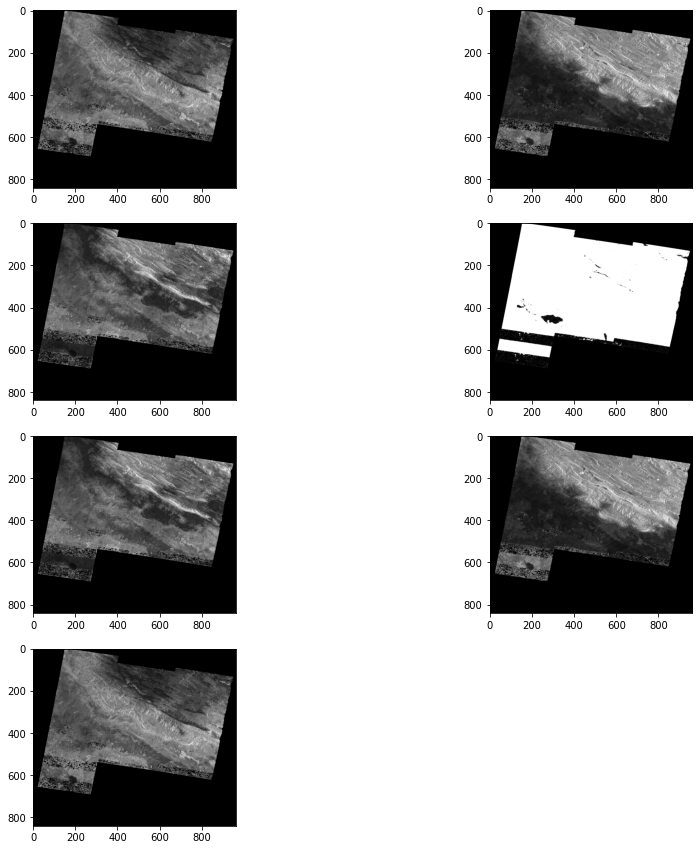

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Sınır çıkarmanın test edilmesi
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

str1 = '20151224_20160210.geo.unw.png'
img = Image.open(str1)
data = np.array(img, dtype='uint8')
image = cv2.imread(str1)

plt.figure(figsize=(15, 15))
plt.subplot(421), plt.imshow(data[:, :, 0], cmap='gray')
plt.subplot(422), plt.imshow(data[:, :, 1], cmap='gray')
plt.subplot(423), plt.imshow(data[:, :, 2], cmap='gray')
plt.subplot(424), plt.imshow(data[:, :, 3], cmap='gray')
plt.subplot(425), plt.imshow(image[:, :, 0], cmap='gray')
plt.subplot(426), plt.imshow(image[:, :, 1], cmap='gray')
plt.subplot(427), plt.imshow(image[:, :, 2], cmap='gray')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f268e230ba8>,
 <matplotlib.image.AxesImage at 0x7f268e1a0518>)

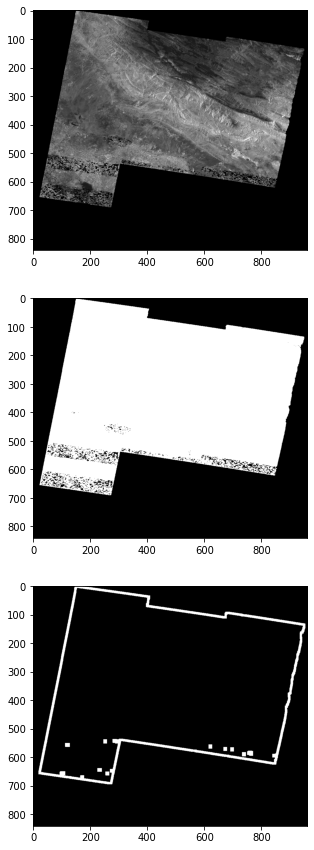

In [ ]:
thresh = cv2.threshold(data[:, :, 2], 0, 255, cv2.THRESH_BINARY)[1]

kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))


mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mask_dil = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
mask_erd = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
bound = mask_dil - mask_erd
bound = cv2.morphologyEx(bound, cv2.MORPH_DILATE, kernel)
bound = 1 - bound


plt.figure(figsize=(15, 15))
plt.subplot(311), plt.imshow(data[:, :, 0], cmap='gray')
plt.subplot(312), plt.imshow(thresh, cmap='gray')
plt.subplot(313), plt.imshow(bound, cmap='gray')